[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hkortier/schoolofai/blob/master/Worksheet_solutions.ipynb)

In [2]:
try:
    # Check if notebook is running in Google Colab
    import google.colab
except:
    pass

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os.path
from os import path
from matplotlib import ticker, cm

from sklearn import gaussian_process, linear_model
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, WhiteKernel, Matern, RationalQuadratic
from sklearn.preprocessing import PolynomialFeatures

----

### Regression of an arbitrary function

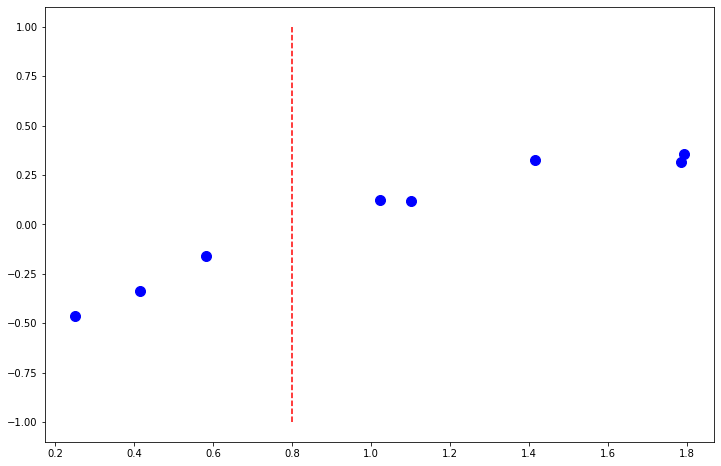

In [11]:
# Create random input/output data

np.random.seed(3)

N = 8
x = np.sort(2*np.random.rand(N))
y = np.sin(x) + .05*np.random.randn(N)
y -= np.sin(np.pi/4)

plt.figure(figsize=(12,8))
plt.plot(x,y,'bo', markersize=10);
plt.vlines(.8,ymin=-1,ymax=1,colors='r',linestyle='dashed');

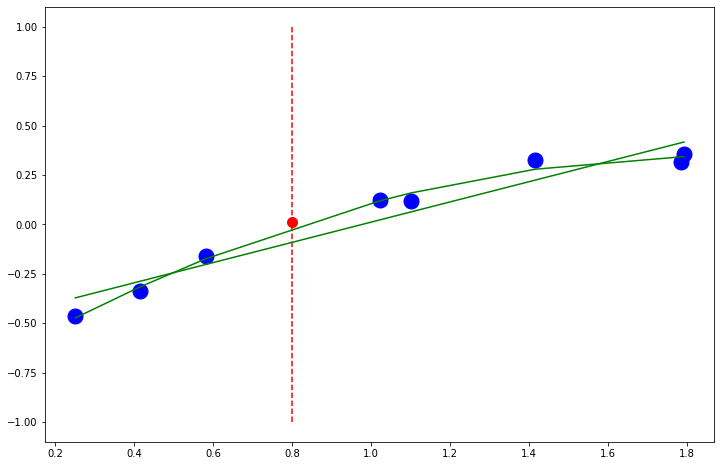

In [12]:
# Do linear and polynomial regression

regr = linear_model.LinearRegression()
regr.fit(x[:,None], y[:,None])
y_pred = regr.predict(x[:,None])
   
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x[:,None])
pol_reg = linear_model.LinearRegression()
pol_reg.fit(x_poly, y[:,None])
y_poly_pred = pol_reg.predict(poly_reg.fit_transform(x[:,None]))

plt.figure(figsize=(12,8))
plt.plot(x,y,'bo', markersize=15)
plt.vlines(.8,ymin=-1,ymax=1,colors='r',linestyle='dashed');
plt.plot(x,y_pred,'g-');
plt.plot(x,y_poly_pred,'g-'); #poly pred
plt.plot(.8,np.sin(.8)-np.sin(np.pi/4),'ro',markersize=10); # true point

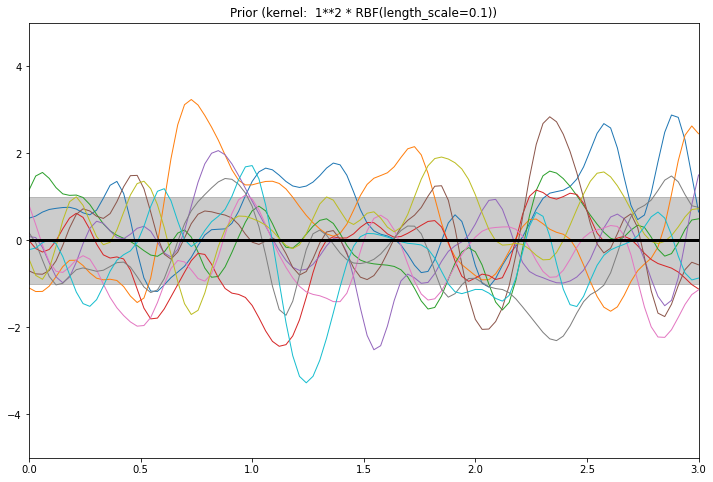

In [13]:
# Define a GP prior and sample subsequently

kernel = 1.0 * RBF(length_scale=.1, length_scale_bounds=(1e-1, 10.0))

gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)

# Plot prior
plt.figure(figsize=(12, 8))
X_ = np.linspace(0, 3, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 3)
plt.ylim(-5, 5)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12);

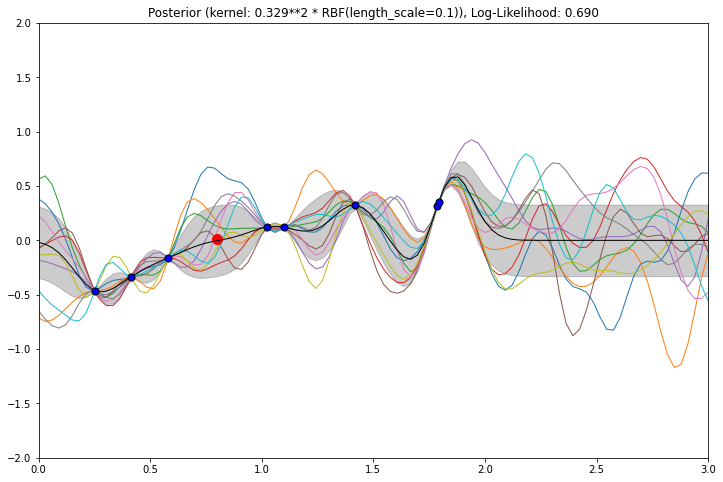

In [14]:
# Learn GP from training data and evaluate and new test points

X = x[:,np.newaxis]
gp.fit(X, y)

plt.figure(figsize=(12, 8))
X_ = np.linspace(0, 3, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=1, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(X[:, 0], y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))

plt.plot(.8,np.sin(.8)-np.sin(np.pi/4),'ro',markersize=10); # true value

plt.xlim(0, 3)
plt.ylim(-2, 2)
plt.title("Posterior (kernel: %s), Log-Likelihood: %.3f" % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)), fontsize=12);

-------

### COVID-19 regression

In [11]:
# Load covid-19 data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

dfTotalCount = pd.read_csv(url)

In [12]:
dfTotalCount

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"Socorro, NM",US,33.8837,-106.7235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
400,"Bernalillo, NM",US,35.0178,-106.6291,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
401,"Oakland, MI",US,42.5922,-83.3362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
402,"Wayne, MI",US,42.2791,-83.3362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
countryLabel = 'Netherlands'
# countryLabel = 'Mainland China'

country = dfTotalCount[dfTotalCount['Country/Region']==countryLabel]
subset = country.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

In [14]:
reports = pd.DataFrame(data=subset.transpose(),index = subset.columns)

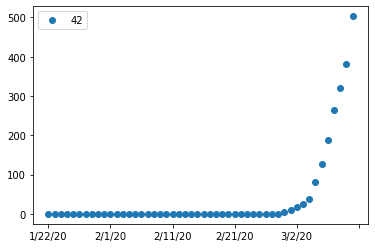

In [15]:
reports.plot(style='o')

In [16]:
x_train = np.linspace(0,subset.values[0].shape[0]-1,subset.values[0].shape[0]).reshape(-1, 1)
y_train = subset.values[0].reshape(-1, 1)

x_pred = np.linspace(0,99,100).reshape(-1, 1)

### SKlearn GP Regression


Learned kernel: 0.83**2 + 316**2 * RationalQuadratic(alpha=141, length_scale=9.67) + WhiteKernel(noise_level=32.3)
Log-marginal-likelihood: -194.688


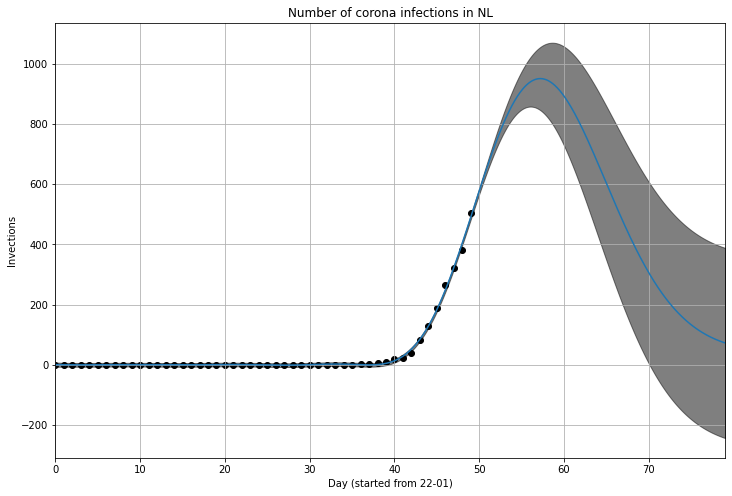

In [22]:
kernel = ConstantKernel(1) + 300**2 * RationalQuadratic(alpha=1, length_scale=10) + WhiteKernel(1)# + 10**2 * RBF(length_scale=1)

gp = gaussian_process.GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
kernel=kernel,
n_restarts_optimizer=5, normalize_y=True,
random_state=None, optimizer='fmin_l_bfgs_b')
gp.fit(x_train, y_train)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(x_train.min(), x_train.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred.ravel() - y_std, y_pred.ravel() + y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Day (started from 22-01)")
plt.ylabel(r"Invections")
plt.title(r"Number of corona infections in NL")
plt.grid()
# plt.tight_layout()
# plt.show()

-------------

## Covid-19 Map - SKLearn Multidimensional Regression 

There are 497.0 invections in the Netherlands on 11032020


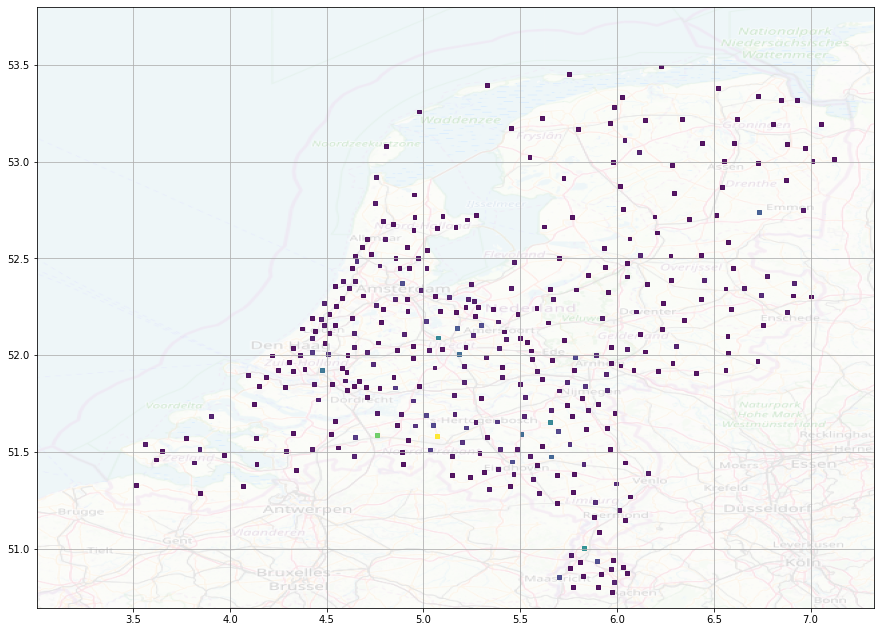

In [10]:
date = '11032020' # started from 03032020
vgzfile = 'klik_corona' + date + '.csv'
vgzurl = 'https://www.volksgezondheidenzorg.info/sites/default/files/map/detail_data/' + vgzfile
if not path.exists('data/' +vgzfile):
    !wget $vgzurl -P data/

df_NL = pd.read_csv('data/'+vgzfile,delimiter=';')

gemeenten = pd.read_csv('https://raw.githubusercontent.com/hkortier/schoolofai/master/data/gemeenten.csv')
gemeenten = gemeenten.rename(columns={"NAAM": "Gemeente"})

# df_NL['Aantal'] = df_NL['Aantal'].str.replace(",", ".").astype(float)
df_NL = df_NL.fillna(0)
print('There are {} invections in the Netherlands on {}'.format(df_NL['Aantal'].sum(),date))

dfNL = df_NL.merge(gemeenten,on='Gemeente')

BBox=np.array([3.0006408691406254,7.325906753540039,50.69414695350509,53.79928213877752])

fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(dfNL.Lon, dfNL.Lat, zorder=1, alpha= 0.9, c=dfNL.Aantal, s=15, marker='s',cmap=plt.cm.viridis)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
nlMap = plt.imread('https://github.com/hkortier/schoolofai/blob/master/figures/mapNetherlands.png?raw=true')
ax.imshow(nlMap, zorder=0, extent = BBox, aspect= 'equal',alpha=.2);
plt.grid()

In [7]:
# Keep only municipalities that have invected inhabitants
# dfNL = dfNL[dfNL['Aantal']>0]

# Training data
X_obs = dfNL[['Lon', 'Lat']].values
y_obs = dfNL['Aantal'].values


Learned kernel: 27.6**2 * RBF(length_scale=0.1)
Log-marginal-likelihood: -1401.198


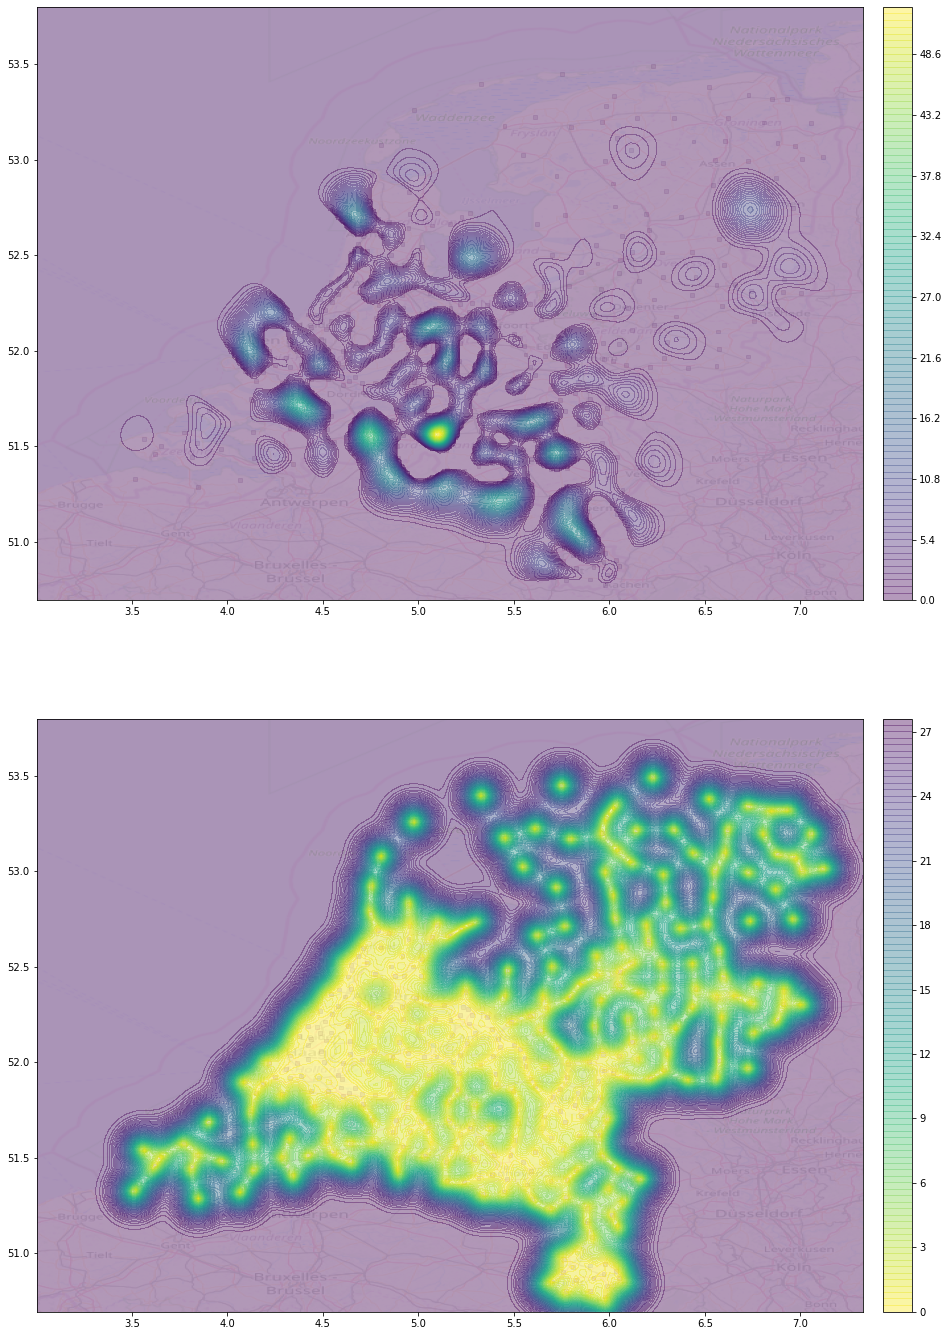

In [8]:
kernel = 10.0 * RBF(length_scale=.1,length_scale_bounds=(1e-1, 1e0))

gp = gaussian_process.GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=2)
gp.fit(X_obs, y_obs)
print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))

nd = 200 # create grid 

z1, z2 = np.meshgrid(np.linspace(BBox[0], BBox[1], nd), np.linspace(BBox[2], BBox[3], nd))
Z = np.concatenate([z1.reshape(nd*nd, 1), z2.reshape(nd*nd, 1)], 1)

y_sl, std_sl = gp.predict(Z, return_std=True)
y_sl[y_sl<0] = 0 #set negative values to zero
y_sl_grid = np.reshape(y_sl,(nd,nd),'F').T
std_sl_grid = np.reshape(std_sl,(nd,nd),'F').T

fig, axes = plt.subplots(nrows=2,ncols=1,figsize = (18,24))
from matplotlib.ticker import MaxNLocator

for ax in axes:
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(nlMap, zorder=0, extent = BBox, aspect= 'equal',alpha=.2)
    ax.scatter(dfNL.Lon, dfNL.Lat, zorder=1, alpha= 0.1, c=dfNL.Aantal, s=15, marker='s',cmap=plt.cm.viridis)

cs = axes[0].contourf(z1, z2, y_sl_grid, cmap=cm.viridis, alpha=.4, levels=100)
fig.colorbar(cs,ax=axes[0],fraction=0.030, pad=0.02)

cs = axes[1].contourf(z1, z2, std_sl_grid, cmap=cm.viridis_r, alpha=.4, levels=100)
fig.colorbar(cs,ax=axes[1],fraction=0.030, pad=0.02);

-----

## Data sources

- [https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases)
- [https://www.volksgezondheidenzorg.info](https://www.volksgezondheidenzorg.info)